In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from ydata_profiling import ProfileReport
import sweetviz as sv

In [2]:
# 读取数据
file_path = r"D:\ArcGISProjects\workspace\shbyq\resule_table\feature_dy_ph.csv"
data = pd.read_csv(file_path)
# data.rename(columns={'有机质含量':'SOM'},inplace=True)
data.head()

,pH,DEM,AnalyticalHillshading,Aspect,ChannelNetworkBaseLevel,ChannelNetworkDistance,ClosedDepressions,ConvergenceIndex,LSFactor,PlanCurvature,...,SecondMoment,Variance,PRE,SRA,TMP,VAP,WIND,BIO,LON,LAT
0,7.00,659.9,0.801314,3.689382,656.78375,3.116272,NaN,1.639718,0.871060,0.000283,...,0.259259,1.111111,98.500000,13031.250,16.483334,1.595833,1.550000,190.74300,477615.0,2912145.0
1,7.51,695.1,0.915071,3.437040,662.05050,33.049500,NaN,0.744609,5.670619,0.001733,...,0.358025,0.222222,98.500000,13031.250,16.483334,1.595833,1.550000,190.74300,477880.0,2912070.0
2,7.36,676.7,0.717656,4.712389,660.24620,16.453796,NaN,-0.612348,2.972762,-0.000313,...,0.802469,0.000000,98.833336,13019.667,16.358334,1.585833,1.566667,190.97212,477905.0,2911870.0
3,7.25,700.6,0.940011,2.176358,693.81040,6.789551,NaN,3.144440,4.590916,0.002804,...,0.283951,0.246914,98.833336,13019.667,16.358334,1.585833,1.566667,190.97212,477630.0,2911675.0
4,6.26,663.8,1.151546,2.137522,655.82210,7.977905,NaN,0.726125,11.618321,-0.000214,...,0.160494,1.111111,98.500000,13031.250,16.483334,1.595833,1.550000,190.74300,477545.0,2912550.0


In [3]:
data.columns

Index(['pH', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT'],
      dtype='object')

In [4]:
data.describe(),data.shape

(                pH          DEM  AnalyticalHillshading       Aspect  \
 count  5909.000000  5909.000000            5909.000000  5904.000000   
 mean      5.681139   951.699814               0.817267     3.158385   
 std       0.813133   166.499122               0.183378     1.718043   
 min       3.430000   492.100000               0.019378     0.001729   
 25%       5.100000   843.200000               0.729889     1.768167   
 50%       5.520000   921.300000               0.792689     3.141593   
 75%       6.130000  1031.100000               0.907358     4.601731   
 max       8.560000  1682.600000               2.082917     6.283186   
 
        ChannelNetworkBaseLevel  ChannelNetworkDistance  ClosedDepressions  \
 count              5909.000000             5909.000000         818.000000   
 mean                943.752683               10.206420          16.320465   
 std                 165.262518               14.542165          21.972474   
 min                 490.994800       

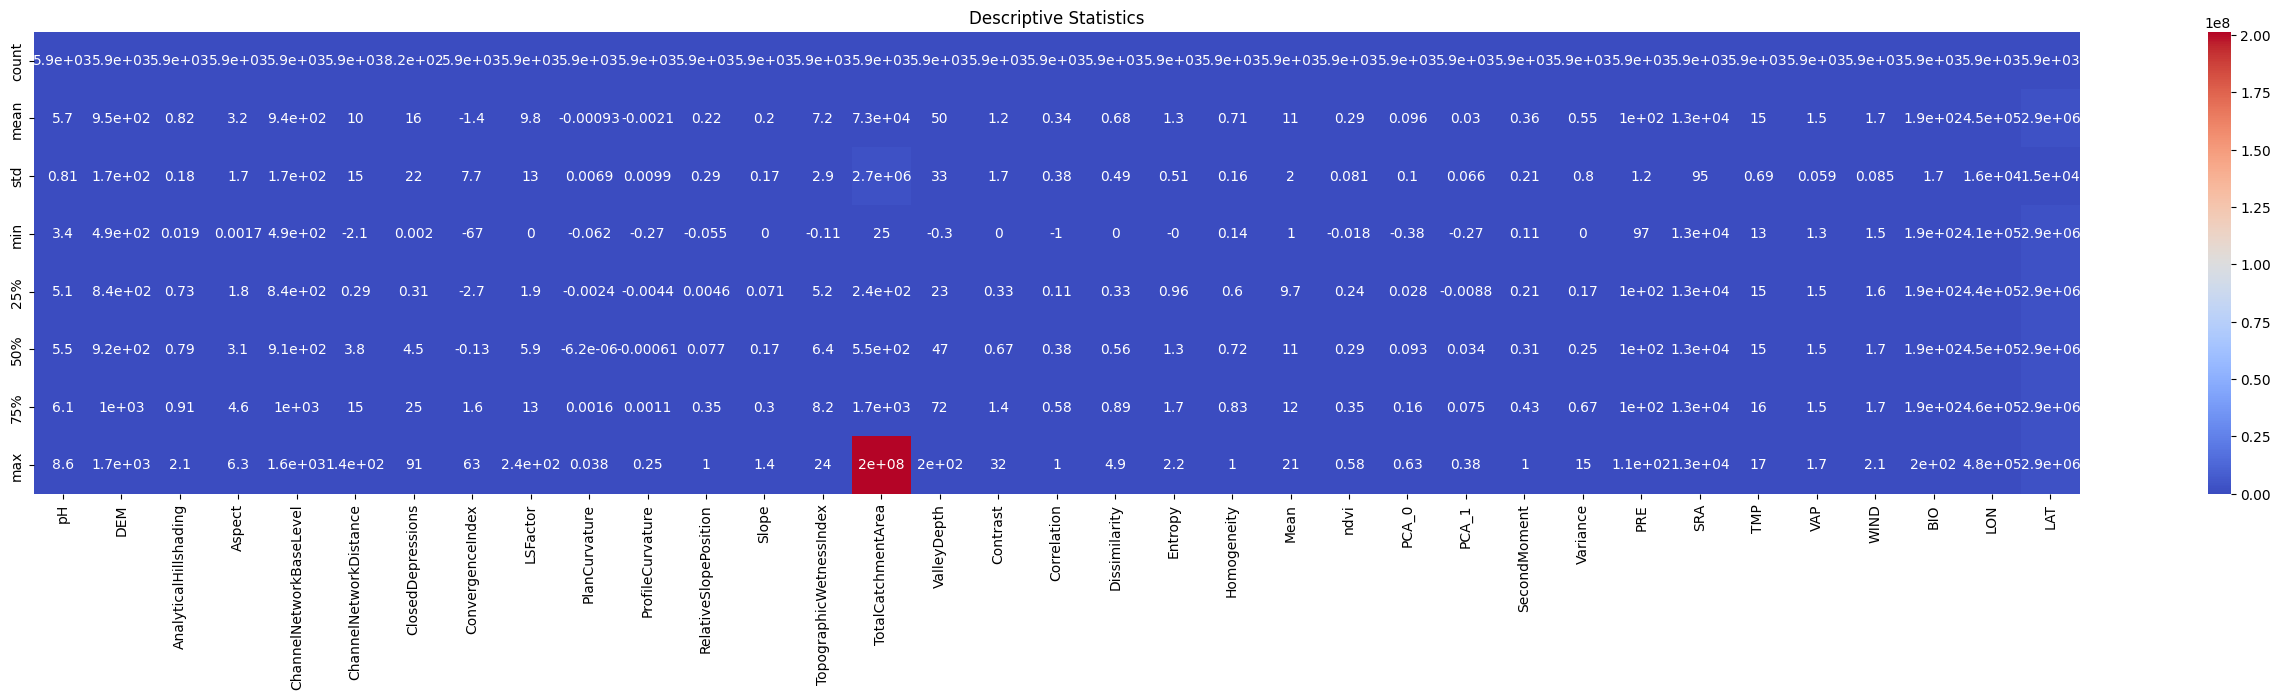

In [5]:
# 绘图
%matplotlib inline
plt.figure(figsize=(33, 6))
sns.heatmap(data.describe(), annot=True, cmap='coolwarm')
plt.title('Descriptive Statistics')
plt.show()



In [7]:
# 区分类别特征
data['TDQS'] = data['TDQS'].astype('str')

In [6]:
# 查看分析报告
profile = ProfileReport(data,title="Pandas Profiling Report")
# 导出数据分析报告
profile.to_file(r"D:\ArcGISProjects\workspace\shbyq\resule_table\report\dy_report_pdf.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# 查看分析报告
sv_file = sv.analyze(data,target_feat='pH',pairwise_analysis="on")
# 导出数据分析报告
sv_file.show_html(filepath=r"D:\ArcGISProjects\workspace\shbyq\resule_table\report\dy_report_swz.html")

                                             |          | [  0%]   00:00 -> (? left)

Report D:\ArcGISProjects\workspace\shbyq\resule_table\report\dy_report_swz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
